# **CVPS20 // Neural Networks with Tensorflow and Keras**

*October 29, 2020*

This notebook will introduce the Tensorflow/Keras framework for constructing and training Neural Networks including an MLP and a CNN.

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

#### **Load the Data and Create Training/Testing Sets**

In [4]:
# -- load data in RGB
ellip = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy") / 255.
spiral = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy") / 255.

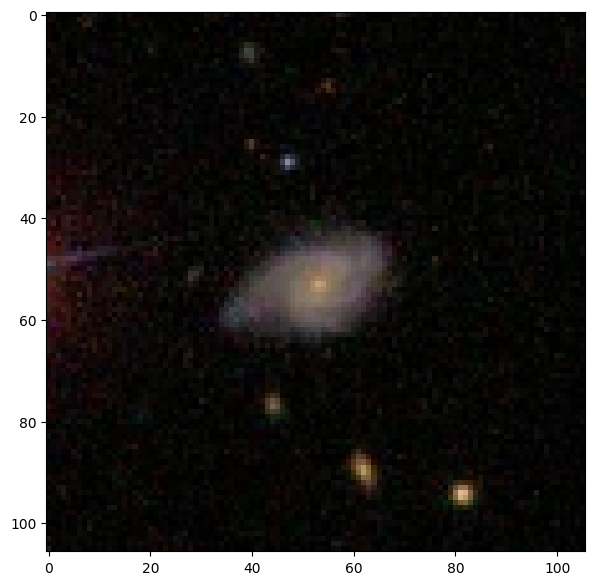

In [5]:
plt.imshow(spiral[0])

In [6]:
# -- concatenate
gals = np.concatenate((ellip, spiral), axis=0)

In [7]:
gals.shape

(10000, 106, 106, 3)

In [8]:
# -- extract shape parameters
ngal = gals.shape[0]
nrow = gals.shape[1]
ncol = gals.shape[2]

In [9]:
# -- create features arrays
galsL = gals.mean(axis=3)
feat = galsL.reshape(ngal, nrow * ncol)

In [ ]:
feat.shape

(10000, 11236)

In [10]:
# -- create the target
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

In [11]:
targ[5000]

1

In [12]:
# -- generate a training/testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, train_size=4000, test_size=1000, random_state=302)

---

#### **Use Tensorflow/Keras to Fit an MLP**

The first step when creating a Neural Network with TF/Keras is defining the individual layers and putting them into a `list`.  For an MLP,

In [13]:
# -- define the layers
layer1 = keras.layers.Dense(10, activation="sigmoid")
layero = keras.layers.Dense(2, activation="softmax")
layers = [layer1, layero]

Next we *instantiate* the model,

In [15]:
# -- instantiate a model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

and then `fit` the model,

In [16]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4640 - loss: 0.7662
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6543 - loss: 0.6508
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.6150
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.5896
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.5709
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7682 - loss: 0.5556
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.5367
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7784 - loss: 0.5325
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.5135
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.5076
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.4965
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

And finally, we assess the model accuracy,

In [17]:
# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Training accuracy : 0.9950
Testing accuracy  : 0.7410


This model is overfit, let's add weight regularization as we did with `sklearn`, only with TF/Keras, the regularization is defined at each layer,

In [18]:
# -- define the layers
layer1 = keras.layers.Dense(10, activation="sigmoid", kernel_regularizer=keras.regularizers.l2(0.01))
layero = keras.layers.Dense(2, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))
layers = [layer1, layero]

# -- instantiate a model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=100, batch_size=100, verbose=0)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Training accuracy : 0.7765
Testing accuracy  : 0.7800


Lastly for this MLP, let's take a look at the confusion between classes,

In [ ]:
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(2))
  ax.set_yticks(range(2))
  ax.set_xticklabels(["ellip", "spiral"])
  ax.set_yticklabels(["ellip", "spiral"])

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(2):
    for jj in range(2):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

In [ ]:
# -- choose the integer with the largest probability for prediction
pred_te =

# -- calculate the confusion matrix
cmat =

# -- plot the confusion matrix
conf_matrix_plot(cmat)

We can, of course, modify our network architecture a bit,

---

#### **Classify Galaxy Type Using a Convolutional Neural Network**

Before we build the model, let's create features that have the full 2D shape,

In [21]:
# -- reshape the features back into 2D
feat_tr = feat_tr.reshape(feat_tr.shape[0], nrow, ncol, 1)
feat_te = feat_te.reshape(feat_te.shape[0], nrow, ncol, 1)

In [22]:
feat_tr.shape

(4000, 106, 106, 1)

In [25]:
# -- define the layers
layer1 = keras.layers.Conv2D(3, (5, 5), activation="sigmoid", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="sigmoid")
layer5 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=20, batch_size=100, verbose=1)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4935 - loss: 1.5156
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4883 - loss: 0.6959
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5208 - loss: 0.6926
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4990 - loss: 0.6937 
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5152 - loss: 0.6932
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5114 - loss: 0.6935
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5133 - loss: 0.6927
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5084 - loss: 0.6932
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5127 - loss: 0.6937
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5122 - loss: 0.6930
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5036 - loss: 0.6936
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5148 - 

In [28]:
# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Training accuracy : 0.5098
Testing accuracy  : 0.5010


*How do we interpret this accuracy?*

Let's make a slight adjustment to our model: the **activation function**,

In [ ]:
# -- FYI, the relu activiation function
z = np.linspace(-4, 4)
plt.figure(figsize=[5, 2.5])
plt.plot(z, z * (z > 0))
plt.title("ReLU activation")
plt.show()

Let's create a bit more clexible and slightly *deeper* CNN,

Note, we're using *luminosity* for training,

In [ ]:
# -- plot the first 10 elliptical and spirals
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(galsL[ii])
for ii in range(10):
  ax[1, ii].imshow(galsL[5000 + ii])
fig.show()

In [ ]:
# -- plot the first layer filters
ww = model.get_weights()[0]
fig, ax = plt.subplots(6, 6, figsize=[10, 10])
for ii in range(32):
  ax[ii // 6, ii % 6].imshow(ww[:, :, 0, ii])
fig.show()

But...